In [1]:
# Step 1: Install Required Libraries
!pip install pytesseract opencv-python googletrans==4.0.0-rc1

In [2]:
# Import necessary libraries
import cv2
import pytesseract
from googletrans import Translator
import matplotlib.pyplot as plt

In [3]:
# Set the path for Tesseract OCR
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [37]:
# Step 2: Load and Preprocess the Image
# Load the image in color
image_path = r'C:\Users\User\Downloads\img5.png'
image = cv2.imread(image_path)

In [38]:
# Convert image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

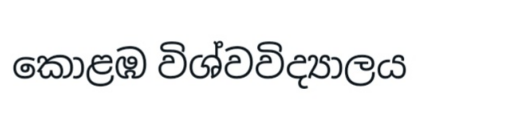

In [39]:
# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [40]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Apply adaptive thresholding
threshold_image = cv2.adaptiveThreshold(blurred_image, 255,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)


In [41]:
# Specify additional configurations for Tesseract
custom_config = r'--oem 3 --psm 6 -l sin'

# Extract text with custom configurations
extracted_text = pytesseract.image_to_string(image_rgb, config=custom_config)

In [42]:
# Step 3: Extract Text Using Tesseract OCR
# Extract text from the image using Tesseract OCR
extracted_text = pytesseract.image_to_string(image_rgb, lang='sin')

# Print the extracted text
print("Extracted Text:")
print(extracted_text)

Extracted Text:
කොළඹ විශ්වවිද්‍යාලය



In [43]:
# Step 4: Translate the Recognized Text
# Initialize the Google Translator
translator = Translator()

# Translate the extracted text from Sinhala to English
translated_text = translator.translate(extracted_text, src='si', dest='en').text

# Print the translated text
print("\nTranslated Text:")
print(translated_text)


Translated Text:
University of Colombo


In [44]:
# Step 5: Integrate All Steps into a Pipeline
# Function to process the image and translate text
def process_and_translate_image(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Extract text from the image
    extracted_text = pytesseract.image_to_string(image_rgb, lang='sin')
    
    # Translate the extracted text
    translator = Translator()
    translated_text = translator.translate(extracted_text, src='si', dest='en').text
    
    return extracted_text, translated_text

In [45]:
# Example usage
extracted_text, translated_text = process_and_translate_image(image_path)

print("Extracted Text:")
print(extracted_text)

print("\nTranslated Text:")
print(translated_text)

Extracted Text:
කොළඹ විශ්වවිද්‍යාලය


Translated Text:
University of Colombo
